# Data-Cleaning
##### Author: Shriya Dale
##### Class: DS 4003 
##### Sprint 2: Data Cleaning
## Dataset Selection
For this analysis, I've chosen to work with a comprehensive dataset sourced from MenuStat, a robust nutritional database that catalogues thousands of food items offered by some of the largest chain restaurants across the United States. This dataset holds significant relevance due to the pivotal role that out-of-home dining plays in shaping the American diet. Studies have shown that meals consumed away from home contribute substantially to daily caloric intake, constituting approximately one-third of total calories consumed, and represent nearly half of the average household's food expenditure. My interest lies in delving deep into the diverse spectrum of nutrients present in these restaurant offerings and exploring how they contribute to overall dietary patterns. I'm interested in creating visualizations that showcase the nutritional composition of various foods in popular chains in America. 
## Data Provenance
This dataset was orginally found on MenuStat, which is a platform that aggregates nutrition information posted on restaurant websites since 2012, with yearly datasets with necessary updates being posted. This dataset is from 2022 as it is the latest dataset available on their website. It provides a valuable resource for researchers and others interested in the nutritional content of restaurant foods and beverages. Originally conceived as a resource for researchers, policymakers, and health professionals, MenuStat's primary objective is to provide comprehensive insights into the nutritional landscape of foods and beverages offered by various restaurant chains. It was built by the New York City Department of Health and Mental Hygiene, but now MenuStat is now run by Harvard Pilgrim Health Care Institute with funding from the National Institutes of Health.



Below is the data cleaning that was performed for the dataset. The main goals was to have tidy data, meaning that variables are present only in columns, observational units are in rows, and each observational unit formed a row. 

In [3]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("foodnutrient.csv", low_memory=False)
df.head()

,matched_2021,new_item_2022,menu_item_id,food_category,restaurant,item_name,item_description,serving_size,serving_size_text,serving_size_unit,...,calories_text,total_fat_text,saturated_fat_text,trans_fat_text,cholesterol_text,sodium_text,carbohydrates_text,dietary_fiber_text,sugar_text,protein_text
0,1,0,10012,Soup,Applebee's,French Onion Soup,"French Onion Soup, Soups",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,10013,Soup,Applebee's,Tomato Basil Soup,"Tomato Basil Soup, Soups",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,10018,Soup,Applebee's,Chicken Tortilla Soup,"Chicken Tortilla Soup, Soups",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,10020,Salads,Applebee's,House Salad,"House Salad, Side Salads",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,10023,Salads,Applebee's,Oriental Chicken Salad,"Oriental Chicken Salad, 1 Breadstick, Salad Dr...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['matched_2021', 'new_item_2022', 'menu_item_id', 'food_category',
       'restaurant', 'item_name', 'item_description', 'serving_size',
       'serving_size_text', 'serving_size_unit', 'serving_size_household',
       'calories', 'total_fat', 'saturated_fat', 'trans_fat', 'cholesterol',
       'sodium', 'carbohydrates', 'dietary_fiber', 'sugar', 'protein',
       'potassium', 'notes', 'calories_text', 'total_fat_text',
       'saturated_fat_text', 'trans_fat_text', 'cholesterol_text',
       'sodium_text', 'carbohydrates_text', 'dietary_fiber_text', 'sugar_text',
       'protein_text'],
      dtype='object')

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

matched_2021                  0
new_item_2022                 0
menu_item_id                  0
food_category                 0
restaurant                    1
item_name                     0
item_description              0
serving_size              13573
serving_size_text         26189
serving_size_unit         14024
serving_size_household    22031
calories                    451
total_fat                   702
saturated_fat               820
trans_fat                  2241
cholesterol                1035
sodium                      965
carbohydrates               964
dietary_fiber              1430
sugar                      1043
protein                    1016
potassium                 24451
notes                     26198
calories_text             26044
total_fat_text            26230
saturated_fat_text        26230
trans_fat_text            26232
cholesterol_text          26232
sodium_text               26230
carbohydrates_text        26230
dietary_fiber_text        26232
sugar_te

In [7]:
indices_to_drop = [0, 1, 7, 8, 9, 10, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]  # List of column indices to drop - main reasons are high numbers of missing values + redundancy in data
df.drop(df.columns[indices_to_drop], axis=1, inplace=True)
df.head()

,menu_item_id,food_category,restaurant,item_name,item_description,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein
0,10012,Soup,Applebee's,French Onion Soup,"French Onion Soup, Soups",370,22.0,12,0,55,1250,26,2,9,16
1,10013,Soup,Applebee's,Tomato Basil Soup,"Tomato Basil Soup, Soups",220,12.0,4.5,1.5,25,1270,22,2,9,5
2,10018,Soup,Applebee's,Chicken Tortilla Soup,"Chicken Tortilla Soup, Soups",280,15.0,4,0,35,930,26,2,3,11
3,10020,Salads,Applebee's,House Salad,"House Salad, Side Salads",130,7.0,2.5,0,10,230,14,2,4,6
4,10023,Salads,Applebee's,Oriental Chicken Salad,"Oriental Chicken Salad, 1 Breadstick, Salad Dr...",1560,103.0,17,1,65,1610,120,12,44,40


In [8]:
#noticed that saturated fat and trans fat have both ints and floats in the columns
#also noticed that when doing df.describe() most of the columns wouldn't show up, so I'm going to convert all the numeric columns to floats
df['saturated_fat'] = pd.to_numeric(df['saturated_fat'], errors='coerce')
df['trans_fat'] = pd.to_numeric(df['trans_fat'], errors='coerce')
df['cholesterol'] = pd.to_numeric(df['cholesterol'], errors='coerce')
df['calories'] = pd.to_numeric(df['calories'], errors='coerce')
df['total_fat'] = pd.to_numeric(df['total_fat'], errors='coerce')
df['sodium'] = pd.to_numeric(df['sodium'], errors='coerce')
df['carbohydrates'] = pd.to_numeric(df['carbohydrates'], errors='coerce')
df['dietary_fiber'] = pd.to_numeric(df['dietary_fiber'], errors='coerce')
df['sugar'] = pd.to_numeric(df['sugar'], errors='coerce')
df['protein'] = pd.to_numeric(df['protein'], errors='coerce')
df.head()


,menu_item_id,food_category,restaurant,item_name,item_description,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein
0,10012,Soup,Applebee's,French Onion Soup,"French Onion Soup, Soups",370.0,22.0,12.0,0.0,55.0,1250.0,26.0,2.0,9.0,16.0
1,10013,Soup,Applebee's,Tomato Basil Soup,"Tomato Basil Soup, Soups",220.0,12.0,4.5,1.5,25.0,1270.0,22.0,2.0,9.0,5.0
2,10018,Soup,Applebee's,Chicken Tortilla Soup,"Chicken Tortilla Soup, Soups",280.0,15.0,4.0,0.0,35.0,930.0,26.0,2.0,3.0,11.0
3,10020,Salads,Applebee's,House Salad,"House Salad, Side Salads",130.0,7.0,2.5,0.0,10.0,230.0,14.0,2.0,4.0,6.0
4,10023,Salads,Applebee's,Oriental Chicken Salad,"Oriental Chicken Salad, 1 Breadstick, Salad Dr...",1560.0,103.0,17.0,1.0,65.0,1610.0,120.0,12.0,44.0,40.0


In [9]:
#the restaurant column has one missing value, so the row will be dropped
df = df.dropna(subset=['restaurant'])

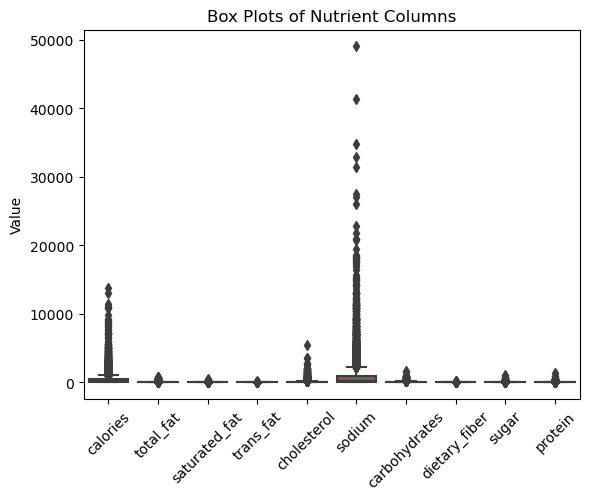

In [10]:
numerical_columns = ['calories', 'total_fat', 'saturated_fat', 'trans_fat', 'cholesterol', 'sodium', 'carbohydrates', 'dietary_fiber', 'sugar', 'protein']
fig, ax = plt.subplots()
sns.boxplot(data=df[numerical_columns], ax=ax)
plt.title("Box Plots of Nutrient Columns")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [11]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = ((df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR)))
df_clean = df[~outliers.any(axis=1)]

# Print the shape of the original and cleaned DataFrame to see the difference
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_clean.shape)

Original DataFrame shape: (26237, 15)
Cleaned DataFrame shape: (17745, 15)


In [12]:
#the calories and sodium columns have a higher deviation than the other columns, so median imputation will be used; the remaining columns will use mean imputation
df['calories'].fillna(df['calories'].median(), inplace=True)
df['sodium'].fillna(df['sodium'].median(), inplace=True)
df['total_fat'].fillna(df['total_fat'].mean(), inplace=True)
df['saturated_fat'].fillna(df['saturated_fat'].mean(), inplace=True)
df['trans_fat'].fillna(df['trans_fat'].mean(), inplace=True)
df['cholesterol'].fillna(df['cholesterol'].mean(), inplace=True)
df['carbohydrates'].fillna(df['carbohydrates'].mean(), inplace=True)
df['dietary_fiber'].fillna(df['dietary_fiber'].mean(), inplace=True)
df['sugar'].fillna(df['sugar'].mean(), inplace=True)
df['protein'].fillna(df['protein'].mean(), inplace=True)
df.head()

,menu_item_id,food_category,restaurant,item_name,item_description,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein
0,10012,Soup,Applebee's,French Onion Soup,"French Onion Soup, Soups",370.0,22.0,12.0,0.0,55.0,1250.0,26.0,2.0,9.0,16.0
1,10013,Soup,Applebee's,Tomato Basil Soup,"Tomato Basil Soup, Soups",220.0,12.0,4.5,1.5,25.0,1270.0,22.0,2.0,9.0,5.0
2,10018,Soup,Applebee's,Chicken Tortilla Soup,"Chicken Tortilla Soup, Soups",280.0,15.0,4.0,0.0,35.0,930.0,26.0,2.0,3.0,11.0
3,10020,Salads,Applebee's,House Salad,"House Salad, Side Salads",130.0,7.0,2.5,0.0,10.0,230.0,14.0,2.0,4.0,6.0
4,10023,Salads,Applebee's,Oriental Chicken Salad,"Oriental Chicken Salad, 1 Breadstick, Salad Dr...",1560.0,103.0,17.0,1.0,65.0,1610.0,120.0,12.0,44.0,40.0


In [13]:
descriptive_stats = df.describe()
print(descriptive_stats)

        menu_item_id      calories     total_fat  saturated_fat     trans_fat  \
count   26237.000000  26237.000000  26237.000000   26237.000000  26237.000000   
mean   655338.239128    385.319095     18.114033       6.470933      0.226500   
std    405673.617118    543.286516     33.631676      12.546649      1.406431   
min         7.000000      0.000000      0.000000       0.000000      0.000000   
25%    170325.000000    110.000000      0.000000       0.000000      0.000000   
50%    938182.000000    240.000000      8.000000       2.500000      0.000000   
75%    951356.000000    480.000000     22.000000       8.000000      0.000000   
max    957946.000000  13734.000000    746.000000     433.000000    180.000000   

        cholesterol        sodium  carbohydrates  dietary_fiber         sugar  \
count  26237.000000  26237.000000   26237.000000   26237.000000  26237.000000   
mean      58.331374    729.802695      41.244303       2.082535     21.262857   
std      131.029706   1424.

In [14]:
duplicate_rows = df.duplicated()
df.drop_duplicates(inplace=True)

In [15]:
#exploratory analysis
num_observations = df_clean.shape[0]
print("Number of observations:", num_observations)

Number of observations: 17745


In [16]:
categorical_variables = ['food_category', 'restaurant', 'item_name']  
for column in categorical_variables:
    num_unique_categories = df_clean[column].nunique()
    print(f"Number of unique categories in {column}: {num_unique_categories}")

Number of unique categories in food_category: 12
Number of unique categories in restaurant: 92
Number of unique categories in item_name: 15431


In [17]:
# Missing data per observation
missing_per_observation = df_clean.isnull().sum(axis=1)
print("Missing data per observation:\n", missing_per_observation)


Missing data per observation:
 0        0
2        0
3        0
5        0
8        0
        ..
26221    0
26223    0
26224    0
26227    0
26228    0
Length: 17745, dtype: int64


In [18]:
imputed_columns = ['calories', 'sodium', 'total_fat', 'saturated_fat', 'trans_fat', 'cholesterol', 'carbohydrates', 'dietary_fiber', 'sugar', 'protein']
missing_per_variable = df[imputed_columns].isnull().sum()
print("Missing data per variable after imputation:\n", missing_per_variable)

Missing data per variable after imputation:
 calories         0
sodium           0
total_fat        0
saturated_fat    0
trans_fat        0
cholesterol      0
carbohydrates    0
dietary_fiber    0
sugar            0
protein          0
dtype: int64


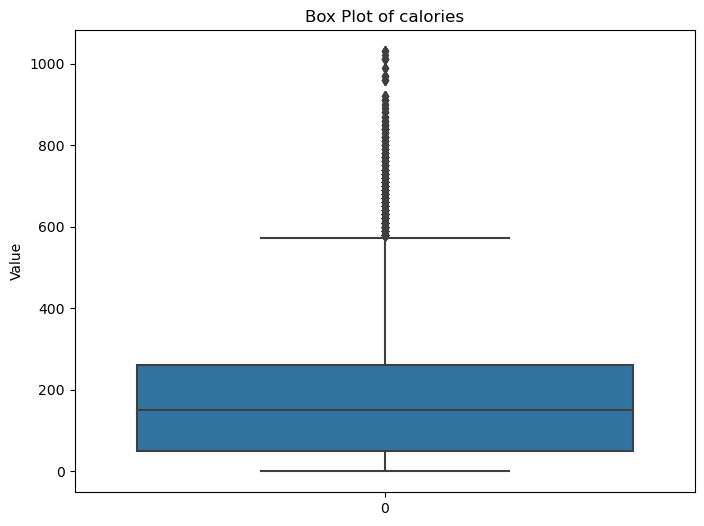

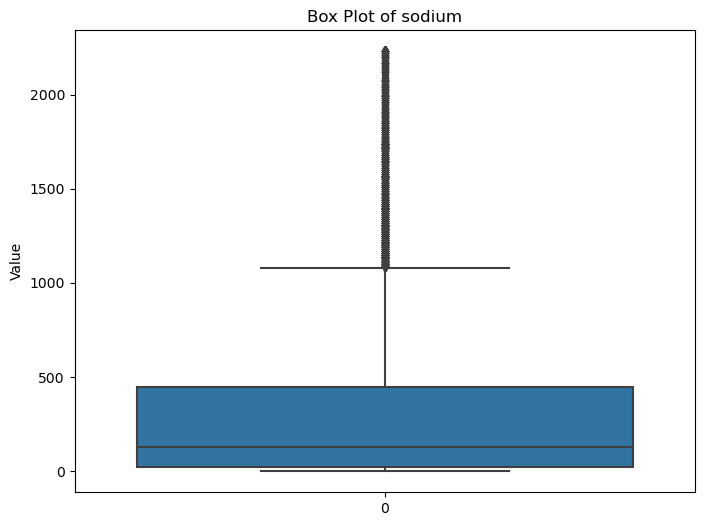

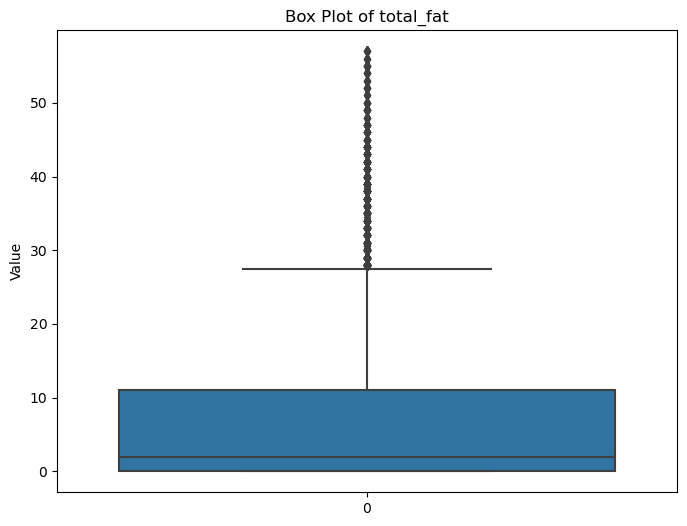

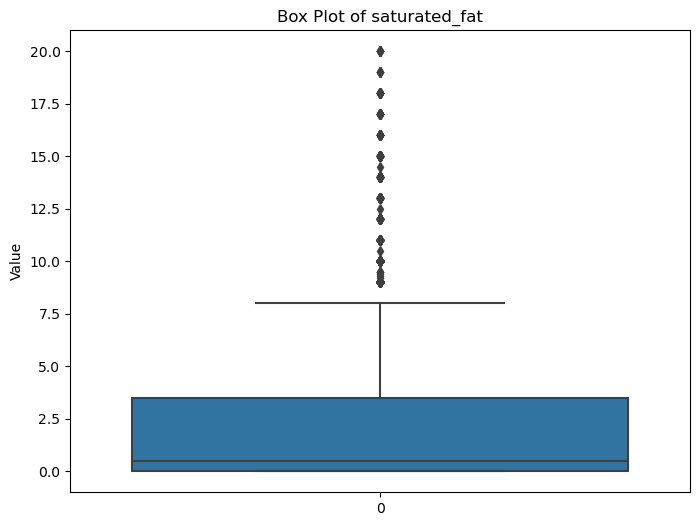

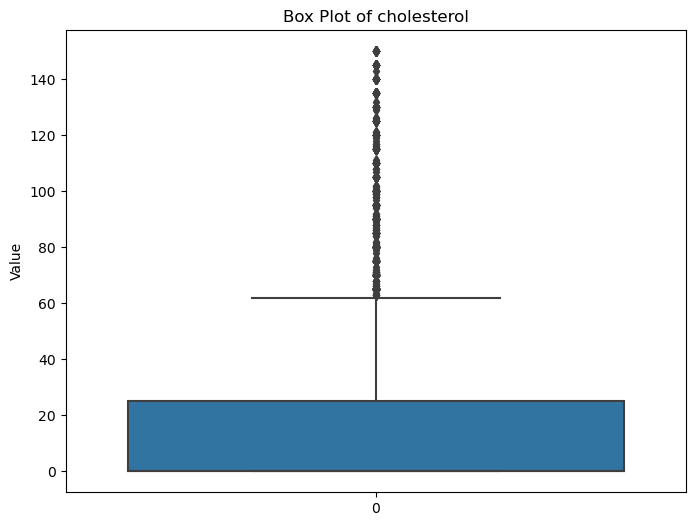

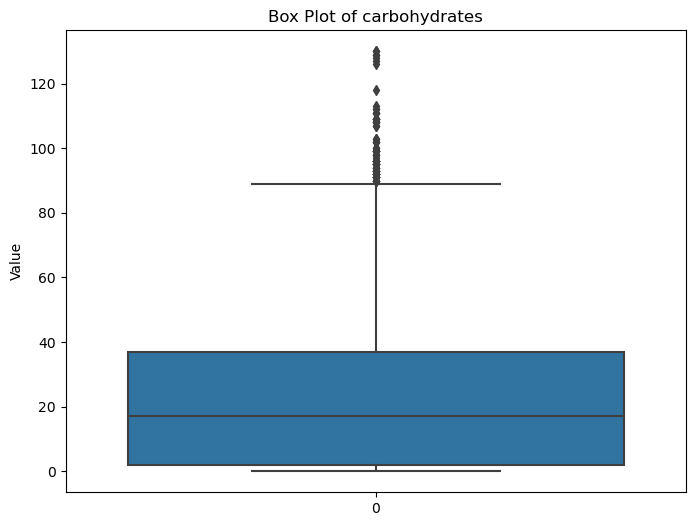

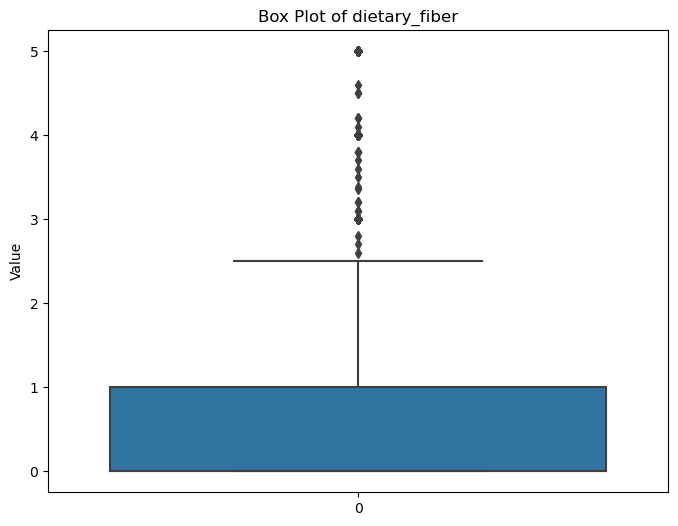

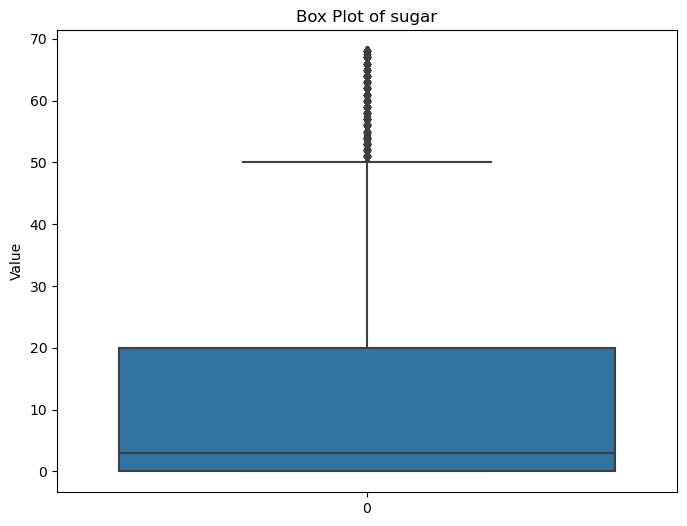

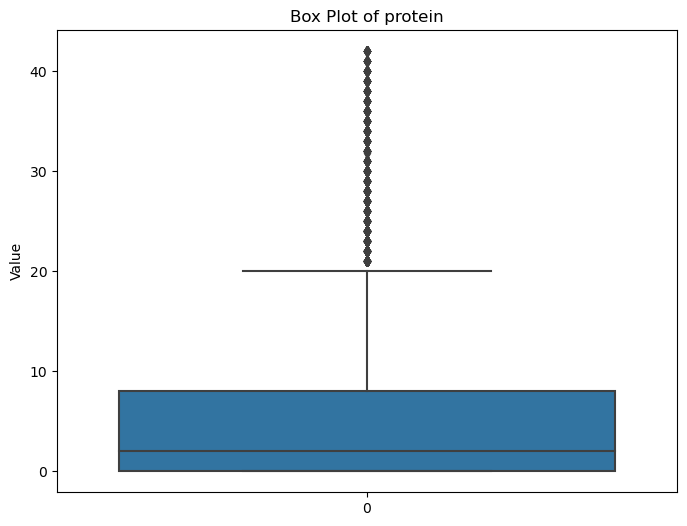

In [19]:
# Specify your continuous columns
continuous_variables = ['calories', 'sodium', 'total_fat', 'saturated_fat', 'cholesterol', 'carbohydrates', 'dietary_fiber', 'sugar', 'protein']

for column in continuous_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_clean[column])
    plt.title(f"Box Plot of {column}")
    plt.ylabel("Value")
    plt.show()

explain the reason for including some of the outliers -- even though you took out a majority

data dictionary

ui component brainstorm

3-6 vvisualizations brainstorm

In [20]:
df.to_csv('data', index = False)